# Final Project Submission

Please fill out:
* Student name: Johnny Dryman
* Student pace: full time
* Scheduled project review date/time: TBD
* Instructor name: James Irving
* Blog post URL: TBD

# INTRODUCTION

> For the Phase 2 Project, we will be analyzing housing sales data for King County (Seattle, WA area).  We will be using multivariate linear regression to explore which features of the data have the greatest influence on price.

## Business Problem

As home values continue to sky rocket in the pandemic era, many King County residents have inquired about how to increase the value of their homes.  Fortunately, we have access to all homes sold in King County for roughly one year, from May 2014 - May 2015.  

This data gives us access to a variety of important metrics both quantitative and somewhat qualitative.  

After scrubbing the data and assuring quality, we will use multivariate linear regression to analyze our features and determine their relationship with sale price.

Finally, we will formulate our observations into useful recommendations to any home owner interested in improving their value.


# OBTAIN

We will begin by importing our packages for data exploration and load our .csv data into a pandas dataframe.

In [871]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/kc_house_data.csv')

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# SCRUB

## Data Preparation

We'll begin by getting a brief overview of our data and check for null values.

In [872]:
df.head()

print(df.info())

print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [873]:
df = df.set_index('id')

Using missingno package to visualize null values.

<AxesSubplot:>

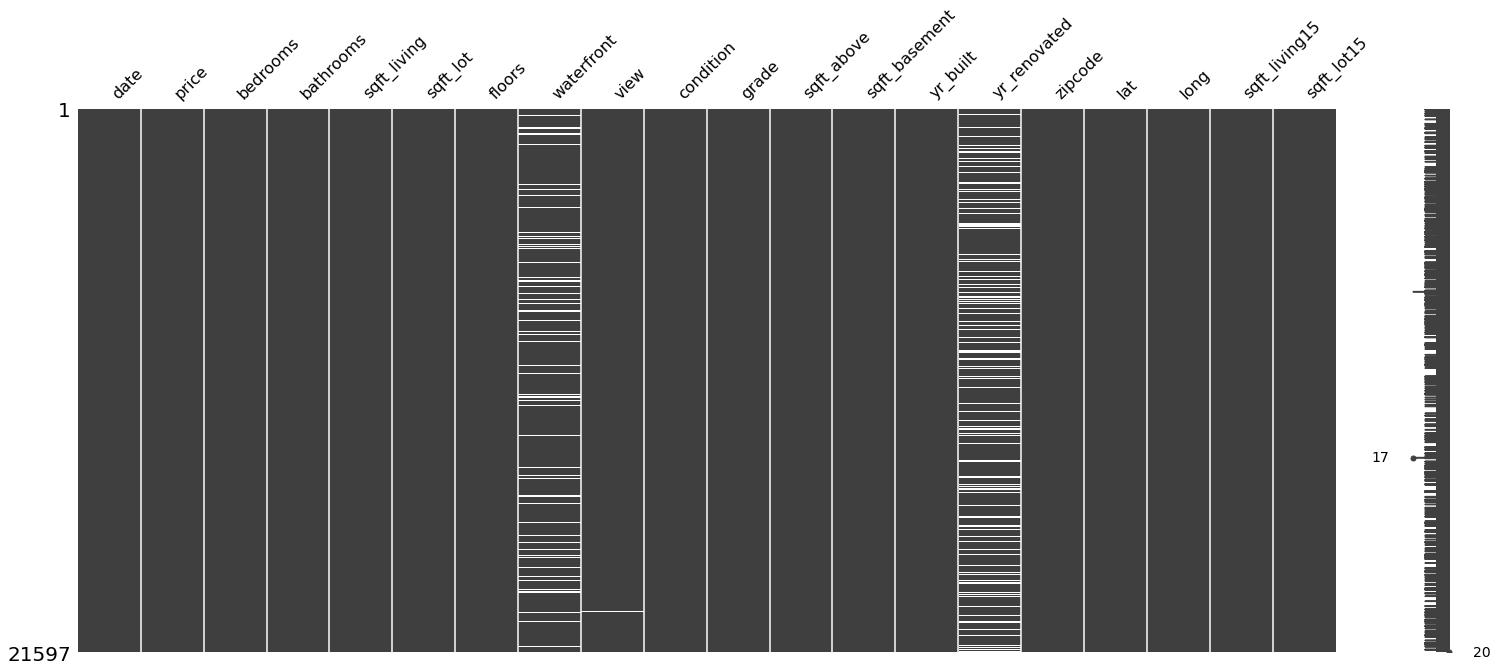

In [874]:
import missingno as msno

msno.matrix(df)

Creating clean_column function, which will help us look at unique items.  This will be useful for identifying any data that seems off or incorrect.

In [875]:
def clean_column(column, unique_count=10):
    column_str = str(column)
    print('Datatype: ' + str(df[column].dtypes))
    print('Total unique itms: ' + str(df[column].nunique()))
    print('Displaying first ' + str(unique_count) + ':')
    print(df[column].unique()[0:unique_count])
    return column_str

def null_count(df):
    print('---Total Entries---')
    print(df.describe())
    print('---Non-Null Values---')
    print(df.notna().describe())

Let's take a look at our features that have null values.

We could conceivably estimate our null values, and that might be interesting for further analysis.  Mapping could be used with 'latitude' and 'longitude' and potentially calculate distance to water.  However, for this project, our safest bet will be to drop the null values.

In [876]:
null_count(df['waterfront'])

---Total Entries---
count   19221.00
mean        0.01
std         0.09
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: waterfront, dtype: float64
---Non-Null Values---
count     21597
unique        2
top        True
freq      19221
Name: waterfront, dtype: object


In [877]:
clean_column('waterfront')

df = df[df['waterfront'].notna()]

clean_column('waterfront')

Datatype: float64
Total unique itms: 2
Displaying first 10:
[nan  0.  1.]
Datatype: float64
Total unique itms: 2
Displaying first 10:
[0. 1.]


'waterfront'

View has very few null values, it is safe to remove them from the dataset.

In [878]:
null_count(df['view'])

---Total Entries---
count   19164.00
mean        0.23
std         0.76
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: view, dtype: float64
---Non-Null Values---
count     19221
unique        2
top        True
freq      19164
Name: view, dtype: object


In [879]:
clean_column('view')

df = df[df['view'].notna()]

clean_column('view')

Datatype: float64
Total unique itms: 5
Displaying first 10:
[ 0. nan  3.  4.  2.  1.]
Datatype: float64
Total unique itms: 5
Displaying first 10:
[0. 3. 4. 2. 1.]


'view'

Yr_renovated has ~3,500 null values.  We would want to consider removing the column in this case, but yr_renovated indicates a renovation occurred with a year (e.g. 2007) and a renovation has never occurred with a zero (e.g. 0).  The null values could also represent houses that have never been renovated, but we can't be sure.

In [880]:
null_count(df['yr_renovated'])

---Total Entries---
count   15762.00
mean       82.44
std       397.21
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2015.00
Name: yr_renovated, dtype: float64
---Non-Null Values---
count     19164
unique        2
top        True
freq      15762
Name: yr_renovated, dtype: object


In [881]:
clean_column('yr_renovated', unique_count=115)

Datatype: float64
Total unique itms: 70
Displaying first 115:
[1991.   nan    0. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1945.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 2008. 2012. 1968. 1963. 1951.
 1962. 1953. 1993. 1955. 1996. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1965. 1967. 1934. 1972. 1944. 1958. 1974.]


'yr_renovated'

We will first remove rows with nan values from the dataset.

In [882]:
df = df[df['yr_renovated'].notna()]

df.describe()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00
mean,541317.18,3.38,2.12,2084.51,15280.82,1.50,0.01,0.23,3.41,7.66,1792.78,1971.11,82.44,98077.56,47.56,-122.21,1990.22,12900.42
std,372225.84,0.94,0.77,918.62,41822.88,0.54,0.09,0.76,0.65,1.17,828.40,29.34,397.21,53.41,0.14,0.14,684.14,27977.23
min,82000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,659.00
25%,321000.00,3.00,1.75,1430.00,5048.50,1.00,0.00,0.00,3.00,7.00,1200.00,1952.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1920.00,7602.00,1.50,0.00,0.00,3.00,7.00,1570.00,1975.00,0.00,98065.00,47.57,-122.23,1846.00,7620.00
75%,644875.00,4.00,2.50,2550.00,10720.00,2.00,0.00,0.00,4.00,8.00,2220.00,1997.00,0.00,98117.00,47.68,-122.12,2370.00,10107.50
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [883]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [884]:
ren_df = df[df['yr_renovated'] != 0]

not_ren_df = df[df['yr_renovated'] == 0]


In [885]:
ren_df['price'].describe()

count       651.00
mean     760872.06
std      637150.64
min      110000.00
25%      410000.00
50%      600000.00
75%      886250.00
max     7700000.00
Name: price, dtype: float64

In [886]:
not_ren_df['price'].describe()

count     15111.00
mean     531858.49
std      353400.02
min       82000.00
25%      320000.00
50%      449000.00
75%      633000.00
max     6890000.00
Name: price, dtype: float64

The means, standard deviations, and medians for renovated and non-renovated houses are significant.  We will revisit yr_renovated and potentially convert the column to a binary value.

Checking non-nulls again.

<AxesSubplot:>

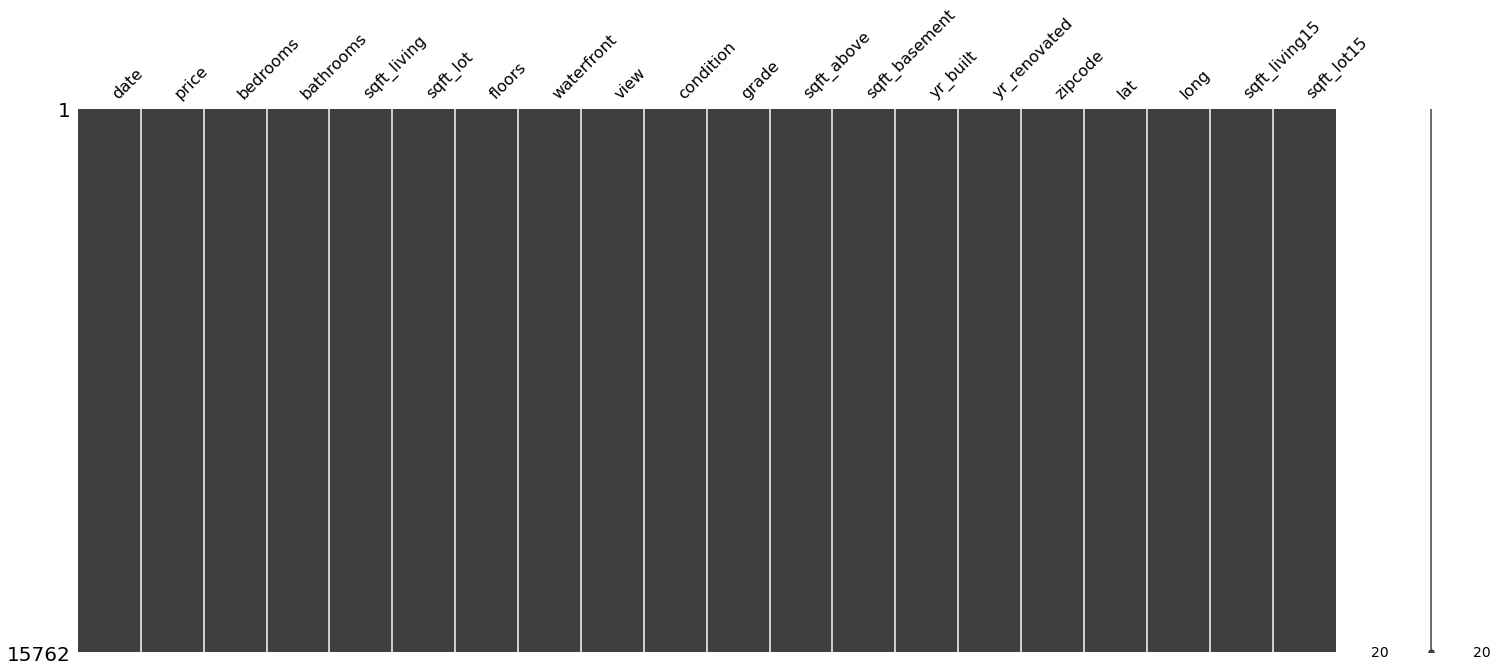

In [887]:
msno.matrix(df)

Now we'll take a look at each column and see if anything needs correction.

## Feature Review

In [888]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 6414100192 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15762 non-null  object 
 1   price          15762 non-null  float64
 2   bedrooms       15762 non-null  int64  
 3   bathrooms      15762 non-null  float64
 4   sqft_living    15762 non-null  int64  
 5   sqft_lot       15762 non-null  int64  
 6   floors         15762 non-null  float64
 7   waterfront     15762 non-null  float64
 8   view           15762 non-null  float64
 9   condition      15762 non-null  int64  
 10  grade          15762 non-null  int64  
 11  sqft_above     15762 non-null  int64  
 12  sqft_basement  15762 non-null  object 
 13  yr_built       15762 non-null  int64  
 14  yr_renovated   15762 non-null  float64
 15  zipcode        15762 non-null  int64  
 16  lat            15762 non-null  float64
 17  long           15762 non-null  float

We will define a few functions to more efficiently analyze individual features.

In [889]:
def clean_column(column, unique_count=10):
    column_str = str(column)
    print('Datatype: ' + str(df[column].dtypes))
    print('Total unique itms: ' + str(df[column].nunique()))
    print('Displaying first ' + str(unique_count) + ':')
    print(df[column].unique()[0:unique_count])
    print(f"Minimum value: {df[column].min()}.  Maximum value: {df[column].max()}")
    print(df[column].describe())
    return column_str

def regplot(column, df=df):
    return sns.regplot(data=df, x=column, y='price')
    
def hist(column):
    hist = df[column].hist()
    return plt.show()

def displot(column):
    return sns.displot(data=df, x=column, y='price')

### Price

### Date

In [890]:
df['date'] = df['date'].apply(pd.to_datetime)


In [891]:
clean_column('date')

df['bedrooms'].describe()

Datatype: datetime64[ns]
Total unique itms: 369
Displaying first 10:
['2014-12-09T00:00:00.000000000' '2015-02-18T00:00:00.000000000'
 '2014-05-12T00:00:00.000000000' '2014-06-27T00:00:00.000000000'
 '2015-04-15T00:00:00.000000000' '2015-03-12T00:00:00.000000000'
 '2014-05-27T00:00:00.000000000' '2014-10-07T00:00:00.000000000'
 '2015-01-24T00:00:00.000000000' '2014-07-31T00:00:00.000000000']
Minimum value: 2014-05-02 00:00:00.  Maximum value: 2015-05-27 00:00:00
count                   15762
unique                    369
top       2014-06-25 00:00:00
freq                      103
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object


<ipython-input-889-17aaff753c74>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[column].describe())


count   15762.00
mean        3.38
std         0.94
min         1.00
25%         3.00
50%         3.00
75%         4.00
max        33.00
Name: bedrooms, dtype: float64

<AxesSubplot:>

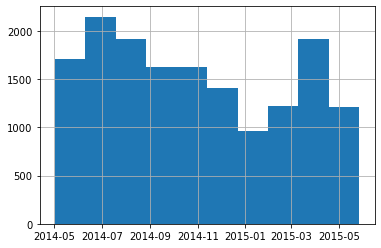

In [892]:
df['date'].hist()

### Bedrooms

In [893]:
clean_column('bedrooms', unique_count=20)

Datatype: int64
Total unique itms: 12
Displaying first 20:
[ 3  4  2  5  1  6  7  8  9 11 10 33]
Minimum value: 1.  Maximum value: 33
count   15762.00
mean        3.38
std         0.94
min         1.00
25%         3.00
50%         3.00
75%         4.00
max        33.00
Name: bedrooms, dtype: float64


'bedrooms'

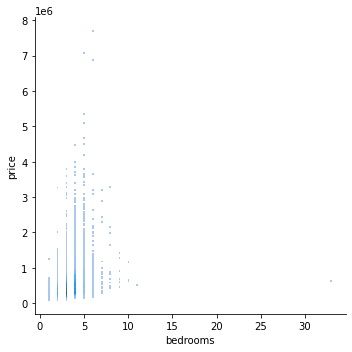

In [894]:
displot('bedrooms')

In [895]:
df.loc[df['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2402100895,2014-06-25,640000.00,33,1.75,1620,6000,1.00,0.00,0.00,5,7,1040,580.0,1947,0.00,98103,47.69,-122.33,1330,4700


Based on other stats, we assume the one entry with 33 bedrooms to actually be 3 bedrooms.  Correcting below.

In [896]:
df['bedrooms'] = df['bedrooms'].replace([33],3)

df.loc[df['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,


In [897]:
df.loc[df['bedrooms'] == 11]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1773100755,2014-08-21,520000.00,11,3.00,3000,4960,2.00,0.00,0.00,3,7,2400,600.0,1918,1999.00,98106,47.56,-122.36,1420,4960


The 11 bedroom house also seems unlikely based on square footage.  Googling the ID '1773100755' revelas it to be a 4 bedroom house.

In [898]:
df['bedrooms'] = df['bedrooms'].replace([11],4)

df.loc[df['bedrooms'] == 11]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,


In [899]:
df.loc[df['bedrooms'] == 10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
627300145,2014-08-14,1150000.00,10,5.25,4590,10920,1.00,0.00,2.00,3,9,2500,2090.0,2008,0.00,98004,47.59,-122.11,2730,10400
5566100170,2014-10-29,650000.00,10,2.00,3610,11914,2.00,0.00,0.00,4,7,3010,600.0,1958,0.00,98006,47.57,-122.17,2040,11914
8812401450,2014-12-29,660000.00,10,3.00,2920,3745,2.00,0.00,0.00,4,7,1860,1060.0,1913,0.00,98105,47.66,-122.32,1810,3745


Even though two of the 10 bedroom houses seem unlikely, a quick google shows that they are recorded as 9 bedroom houses on zillow.  We will assume these entries were accurate at the time, and will not change.

### Bathrooms

In [900]:
clean_column('bathrooms', unique_count=29)

Datatype: float64
Total unique itms: 27
Displaying first 29:
[2.25 3.   2.   4.5  1.   2.5  1.75 2.75 1.5  3.25 4.   3.5  0.75 5.
 4.25 3.75 1.25 5.25 4.75 0.5  5.5  6.   5.75 8.   6.75 7.5  7.75]
Minimum value: 0.5.  Maximum value: 8.0
count   15762.00
mean        2.12
std         0.77
min         0.50
25%         1.75
50%         2.25
75%         2.50
max         8.00
Name: bathrooms, dtype: float64


'bathrooms'

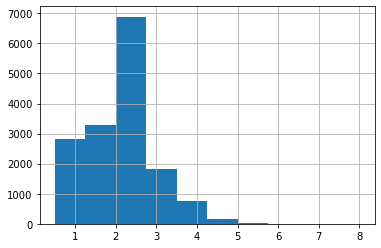

In [901]:
hist('bathrooms')

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

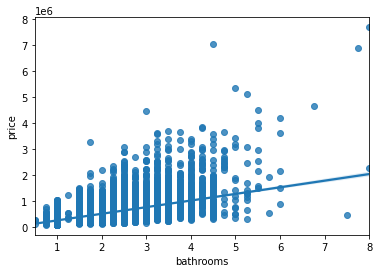

In [902]:
regplot('bathrooms')

### Squarefoot - Living

In [903]:
clean_column('sqft_living')

Datatype: int64
Total unique itms: 912
Displaying first 10:
[2570 1960 1680 5420 1715 1780 1890 1160 1370 1810]
Minimum value: 370.  Maximum value: 13540
count   15762.00
mean     2084.51
std       918.62
min       370.00
25%      1430.00
50%      1920.00
75%      2550.00
max     13540.00
Name: sqft_living, dtype: float64


'sqft_living'

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

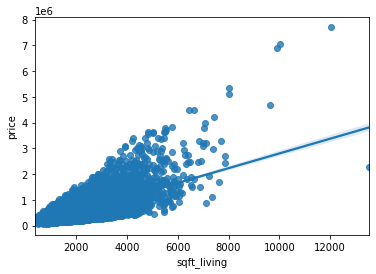

In [904]:
regplot('sqft_living')

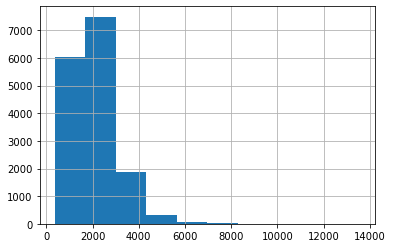

In [905]:
hist('sqft_living')

There seem to be at least one unusual outlier for the price.  We will want to take a look at the largest values to verify the quality of the data.

In [906]:
df.sort_values(by=['sqft_living'], ascending=False).head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1225069038,2014-05-05,2280000.00,7,8.00,13540,307752,3.00,0.00,4.00,3,12,9410,4130.0,1999,0.00,98053,47.67,-121.99,4850,217800
6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,0.00,3.00,4,13,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
9808700762,2014-06-11,7060000.00,5,4.50,10040,37325,2.00,1.00,2.00,3,11,7680,2360.0,1940,2001.00,98004,47.65,-122.21,3930,25449
9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,0.00,4.00,3,13,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
1924059029,2014-06-17,4670000.00,5,6.75,9640,13068,1.00,1.00,4.00,3,12,4820,4820.0,1983,2009.00,98040,47.56,-122.21,3270,10454


After reviewing the one outlier, it seems to be a compound in a rural area, and the sqft seems realistic.

### Squarefoot - Lot

Datatype: int64
Total unique itms: 7927
Displaying first 10:
[  7242   5000   8080 101930   6819   7470   6560   6000   9680   4850]
Minimum value: 520.  Maximum value: 1651359
count     15762.00
mean      15280.82
std       41822.88
min         520.00
25%        5048.50
50%        7602.00
75%       10720.00
max     1651359.00
Name: sqft_lot, dtype: float64


<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

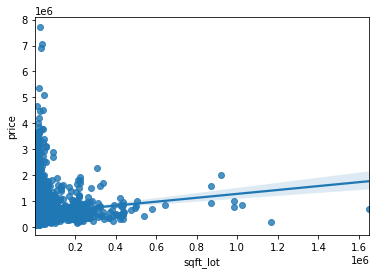

In [907]:
clean_column('sqft_lot')
regplot('sqft_lot')

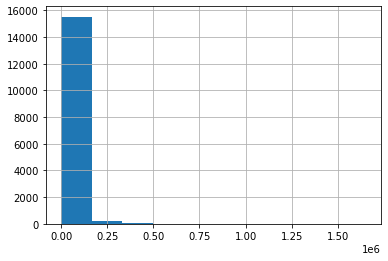

In [908]:
hist('sqft_lot')

In [909]:
df.sort_values(by=['sqft_lot'], ascending=False).head(5)

#outlier looks like a farm, will keep

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1020069017,2015-03-27,700000.00,4,1.00,1300,1651359,1.00,0.00,3.00,4,6,1300,0.0,1920,0.00,98022,47.23,-122.02,2560,425581
3326079016,2015-05-04,190000.00,2,1.00,710,1164794,1.00,0.00,0.00,2,5,710,0.0,1915,0.00,98014,47.69,-121.91,1680,16730
2323089009,2015-01-19,855000.00,4,3.50,4030,1024068,2.00,0.00,0.00,3,10,4030,0.0,2006,0.00,98045,47.46,-121.74,1830,11700
722069232,2014-09-05,998000.00,4,3.25,3770,982998,2.00,0.00,0.00,3,10,3770,0.0,1992,0.00,98058,47.41,-122.09,2290,37141
3626079040,2014-07-30,790000.00,2,3.00,2560,982278,1.00,0.00,0.00,3,8,2560,0.0,2004,0.00,98014,47.70,-121.86,1620,40946


### Floors

Datatype: float64
Total unique itms: 6
Displaying first 10:
[2.  1.  1.5 3.  2.5 3.5]
Minimum value: 1.0.  Maximum value: 3.5
count   15762.00
mean        1.50
std         0.54
min         1.00
25%         1.00
50%         1.50
75%         2.00
max         3.50
Name: floors, dtype: float64


<AxesSubplot:xlabel='floors', ylabel='price'>

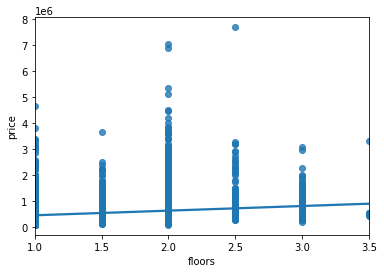

In [910]:
clean_column('floors')

regplot('floors')

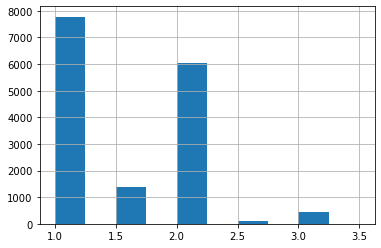

In [911]:
hist('floors')

### Waterfront

Datatype: float64
Total unique itms: 2
Displaying first 10:
[0. 1.]
Minimum value: 0.0.  Maximum value: 1.0
count   15762.00
mean        0.01
std         0.09
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: waterfront, dtype: float64


<AxesSubplot:xlabel='waterfront', ylabel='price'>

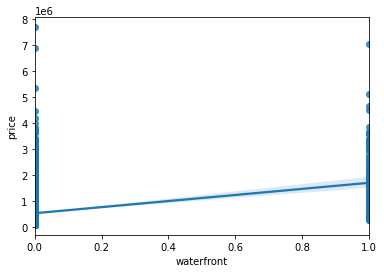

In [912]:
clean_column('waterfront')

regplot('waterfront')

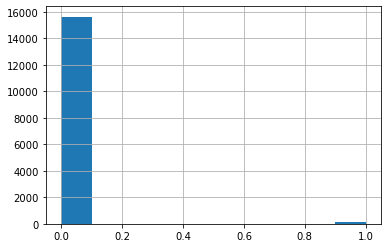

In [913]:
hist('waterfront')

### View

Datatype: float64
Total unique itms: 5
Displaying first 10:
[0. 3. 4. 2. 1.]
Minimum value: 0.0.  Maximum value: 4.0
count   15762.00
mean        0.23
std         0.76
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: view, dtype: float64


<AxesSubplot:xlabel='view', ylabel='price'>

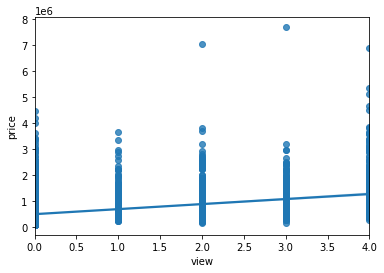

In [914]:
clean_column('view')

regplot('view')

### Condition

Datatype: int64
Total unique itms: 5
Displaying first 10:
[3 5 4 1 2]
Minimum value: 1.  Maximum value: 5
count   15762.00
mean        3.41
std         0.65
min         1.00
25%         3.00
50%         3.00
75%         4.00
max         5.00
Name: condition, dtype: float64


<AxesSubplot:xlabel='condition', ylabel='price'>

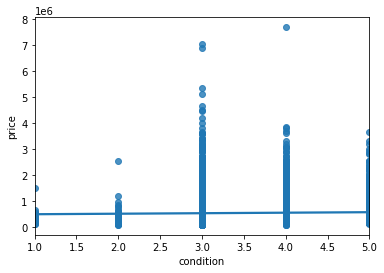

In [915]:
clean_column('condition')

regplot('condition')

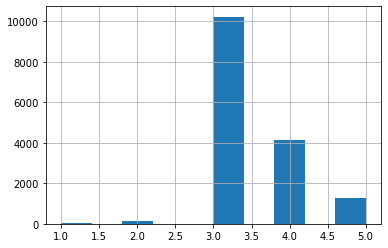

In [916]:
hist('condition')

### Grade

Datatype: int64
Total unique itms: 11
Displaying first 10:
[ 7  8 11  9  6  5 10 12  4  3]
Minimum value: 3.  Maximum value: 13
count   15762.00
mean        7.66
std         1.17
min         3.00
25%         7.00
50%         7.00
75%         8.00
max        13.00
Name: grade, dtype: float64


<AxesSubplot:xlabel='grade', ylabel='price'>

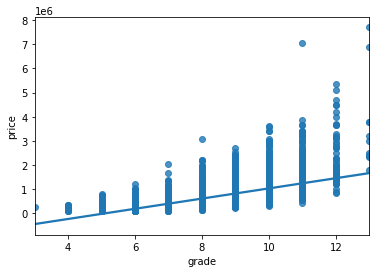

In [917]:
clean_column('grade')

regplot('grade')

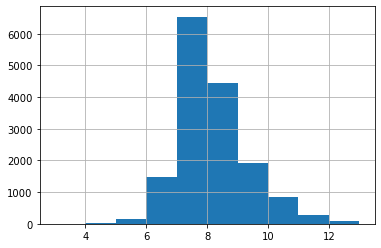

In [918]:
hist('grade')

In [919]:
df[df['grade'] == 13]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
9831200500,2015-03-04,2480000.00,5,3.75,6810,7500,2.50,0.00,0.00,3,13,6110,700.0,1922,0.00,98102,47.63,-122.32,2660,7500
7237501190,2014-10-10,1780000.00,4,3.25,4890,13402,2.00,0.00,0.00,3,13,4890,0.0,2004,0.00,98059,47.53,-122.13,5790,13539
1725059316,2014-11-20,2390000.00,4,4.00,6330,13296,2.00,0.00,2.00,3,13,4900,1430.0,2000,0.00,98033,47.65,-122.20,2200,9196
853200010,2014-07-01,3800000.00,5,5.50,7050,42840,1.00,0.00,2.00,4,13,4320,2730.0,1978,0.00,98004,47.62,-122.22,5070,20570
6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,0.00,3.00,4,13,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
1068000375,2014-09-23,3200000.00,6,5.00,7100,18200,2.50,0.00,0.00,3,13,5240,1860.0,1933,2002.00,98199,47.64,-122.41,3130,6477
9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,0.00,4.00,3,13,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
3303850390,2014-12-12,2980000.00,5,5.50,7400,18898,2.00,0.00,3.00,3,13,6290,1110.0,2001,0.00,98006,47.54,-122.11,6110,26442
2426039123,2015-01-30,2420000.00,5,4.75,7880,24250,2.00,0.00,2.00,3,13,7880,0.0,1996,0.00,98177,47.73,-122.36,2740,10761


### Squarefoot Above

Datatype: int64
Total unique itms: 835
Displaying first 10:
[2170 1050 1680 3890 1715 1890  860 1370 1810 1980]
Minimum value: 370.  Maximum value: 9410
count   15762.00
mean     1792.78
std       828.40
min       370.00
25%      1200.00
50%      1570.00
75%      2220.00
max      9410.00
Name: sqft_above, dtype: float64


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

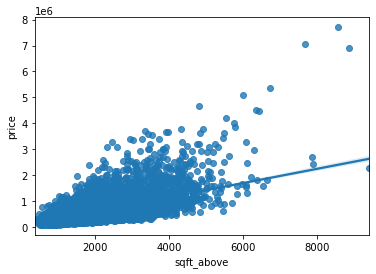

In [920]:
clean_column('sqft_above')

regplot('sqft_above')

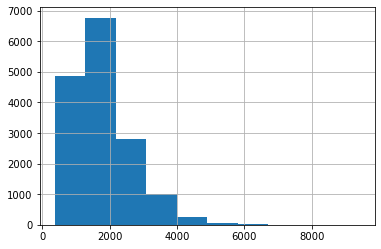

In [921]:
hist('sqft_above')

### Squarefoot Basement

In [922]:
clean_column('sqft_basement')


Datatype: object
Total unique itms: 283
Displaying first 10:
['400.0' '910.0' '0.0' '1530.0' '?' '730.0' '300.0' '970.0' '760.0'
 '720.0']
Minimum value: 0.0.  Maximum value: ?
count     15762
unique      283
top         0.0
freq       9362
Name: sqft_basement, dtype: object


'sqft_basement'

It seems there are some errors with question marks.  Let's take a look.

In [923]:
df[df['sqft_basement'] == '?']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1321400060,2014-06-27,257500.00,3,2.25,1715,6819,2.00,0.00,0.00,3,7,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819
16000397,2014-12-05,189000.00,2,1.00,1200,9850,1.00,0.00,0.00,4,7,1200,?,1921,0.00,98002,47.31,-122.21,1060,5095
7203220400,2014-07-07,861990.00,5,2.75,3595,5639,2.00,0.00,0.00,3,9,3595,?,2014,0.00,98053,47.68,-122.02,3625,5639
1531000030,2015-03-23,720000.00,4,2.50,3450,39683,2.00,0.00,0.00,3,10,3450,?,2002,0.00,98010,47.34,-122.03,3350,39750
2525310310,2014-09-16,272500.00,3,1.75,1540,12600,1.00,0.00,0.00,4,7,1160,?,1980,0.00,98038,47.36,-122.03,1540,11656
1909600046,2014-07-03,445838.00,3,2.50,2250,5692,2.00,0.00,0.00,3,8,2250,?,2000,0.00,98146,47.51,-122.38,1320,5390
713500030,2014-07-28,1350000.00,5,3.50,4800,14984,2.00,0.00,2.00,3,11,3480,?,1998,0.00,98006,47.55,-122.15,4050,19009
5113400431,2014-05-08,615000.00,2,1.00,1540,6872,1.00,0.00,0.00,4,7,820,?,1946,0.00,98119,47.65,-122.37,1420,5538
8832900550,2014-09-12,650000.00,3,2.50,2690,11575,1.00,0.00,3.00,3,8,2130,?,1957,0.00,98028,47.76,-122.27,2390,11782


It might be best to go ahead and make a "True" and "False" boolean column for 'has_basement.'  We will also change all '?' values to zero (0) and conver the values into floats.

In [924]:
# df['sqft_basement'] = df['sqft_basement'].replace(['?'],0.0)

df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

df.loc[df['sqft_basement'] == '?']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,


In [925]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [926]:
# run this line if need to rerun and delete 'has_basement'
# del df['has_basement']

has_basement = np.where(df['sqft_basement'] > 0, 1, 0)

df.insert (12, 'has_basement', has_basement)

df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,has_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,,
6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,...,2170,1,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,...,1050,1,910.00,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,...,1680,0,0.00,1987,0.00,98074,47.62,-122.05,1800,7503
7237550310,2014-05-12,1230000.00,4,4.50,5420,101930,1.00,0.00,0.00,3,...,3890,1,1530.00,2001,0.00,98053,47.66,-122.00,4760,101930
1321400060,2014-06-27,257500.00,3,2.25,1715,6819,2.00,0.00,0.00,3,...,1715,0,0.00,1995,0.00,98003,47.31,-122.33,2238,6819


### Year Built

Datatype: int64
Total unique itms: 116
Displaying first 10:
[1951 1965 1987 2001 1995 1960 2003 1942 1977 1900]
Minimum value: 1900.  Maximum value: 2015
count   15762.00
mean     1971.11
std        29.34
min      1900.00
25%      1952.00
50%      1975.00
75%      1997.00
max      2015.00
Name: yr_built, dtype: float64


<AxesSubplot:xlabel='yr_built', ylabel='price'>

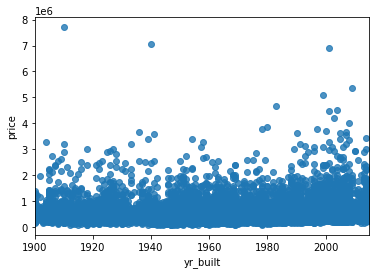

In [927]:
clean_column('yr_built')

regplot('yr_built')

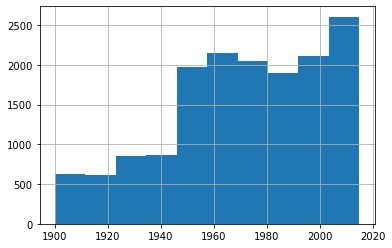

In [928]:
hist('yr_built')

We will convert this to age to more easily interpret this feature in our model.

In [929]:
df['age'] = abs(df['yr_built'] - 2015)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,has_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
id,,,,,,,,,,,,,,,,,,,,,
6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,...,1,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639,64
2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,...,1,910.00,1965,0.00,98136,47.52,-122.39,1360,5000,50
1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,...,0,0.00,1987,0.00,98074,47.62,-122.05,1800,7503,28
7237550310,2014-05-12,1230000.00,4,4.50,5420,101930,1.00,0.00,0.00,3,...,1,1530.00,2001,0.00,98053,47.66,-122.00,4760,101930,14
1321400060,2014-06-27,257500.00,3,2.25,1715,6819,2.00,0.00,0.00,3,...,0,0.00,1995,0.00,98003,47.31,-122.33,2238,6819,20


Datatype: int64
Total unique itms: 116
Displaying first 10:
[ 64  50  28  14  20  55  12  73  38 115]
Minimum value: 0.  Maximum value: 115
count   15762.00
mean       43.89
std        29.34
min         0.00
25%        18.00
50%        40.00
75%        63.00
max       115.00
Name: age, dtype: float64


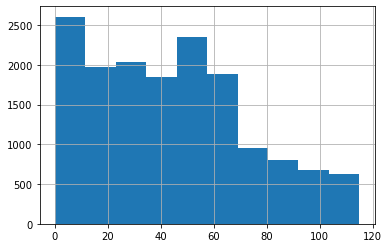

In [930]:
clean_column('age')

hist('age')

In [931]:
del df['yr_built']

### Year Renovated

Datatype: float64
Total unique itms: 70
Displaying first 10:
[1991.    0. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003.]
Minimum value: 0.0.  Maximum value: 2015.0
count   15762.00
mean       82.44
std       397.21
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2015.00
Name: yr_renovated, dtype: float64


<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

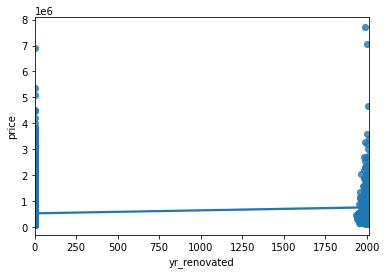

In [932]:
clean_column('yr_renovated')

regplot('yr_renovated')

Convert to binary.

In [933]:
renovated = np.where(df['yr_renovated'] > 0, 1, 0)

df['renovated'] = renovated

del df['yr_renovated']

df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,has_basement,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated
id,,,,,,,,,,,,,,,,,,,,,
6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,...,2170,1,400.00,98125,47.72,-122.32,1690,7639,64,1
2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,...,1050,1,910.00,98136,47.52,-122.39,1360,5000,50,0
1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,...,1680,0,0.00,98074,47.62,-122.05,1800,7503,28,0
7237550310,2014-05-12,1230000.00,4,4.50,5420,101930,1.00,0.00,0.00,3,...,3890,1,1530.00,98053,47.66,-122.00,4760,101930,14,0
1321400060,2014-06-27,257500.00,3,2.25,1715,6819,2.00,0.00,0.00,3,...,1715,0,0.00,98003,47.31,-122.33,2238,6819,20,0


In [934]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,has_basement,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated
id,,,,,,,,,,,,,,,,,,,,,
6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,...,2170,1,400.00,98125,47.72,-122.32,1690,7639,64,1
2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,...,1050,1,910.00,98136,47.52,-122.39,1360,5000,50,0
1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,...,1680,0,0.00,98074,47.62,-122.05,1800,7503,28,0
7237550310,2014-05-12,1230000.00,4,4.50,5420,101930,1.00,0.00,0.00,3,...,3890,1,1530.00,98053,47.66,-122.00,4760,101930,14,0
1321400060,2014-06-27,257500.00,3,2.25,1715,6819,2.00,0.00,0.00,3,...,1715,0,0.00,98003,47.31,-122.33,2238,6819,20,0


### Zipcode

In [935]:
clean_column('zipcode')

Datatype: int64
Total unique itms: 70
Displaying first 10:
[98125 98136 98074 98053 98003 98146 98038 98115 98107 98126]
Minimum value: 98001.  Maximum value: 98199
count   15762.00
mean    98077.56
std        53.41
min     98001.00
25%     98033.00
50%     98065.00
75%     98117.00
max     98199.00
Name: zipcode, dtype: float64


'zipcode'

Zipcode should be integer for now, since there will be no decimals.  It might be worth considering conversion to string as well further in the project.

In [936]:
df['zipcode'] = df['zipcode'].astype(int)

Datatype: int32
Total unique itms: 70
Displaying first 10:
[98125 98136 98074 98053 98003 98146 98038 98115 98107 98126]
Minimum value: 98001.  Maximum value: 98199
count   15762.00
mean    98077.56
std        53.41
min     98001.00
25%     98033.00
50%     98065.00
75%     98117.00
max     98199.00
Name: zipcode, dtype: float64


<AxesSubplot:xlabel='zipcode', ylabel='price'>

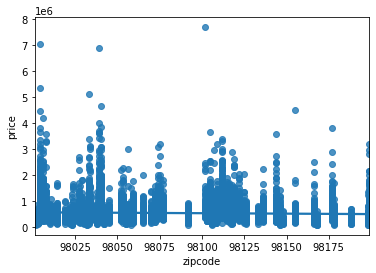

In [937]:
clean_column('zipcode')

regplot('zipcode')

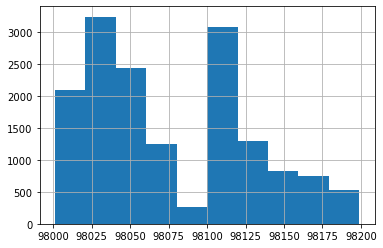

In [938]:
hist('zipcode')

### 'sqft_living15'

The square footage of interior housing living space for the nearest 15 neighbors

Datatype: int64
Total unique itms: 694
Displaying first 10:
[1690 1360 1800 4760 2238 1780 2390 1330 1370 2140]
Minimum value: 399.  Maximum value: 6210
count   15762.00
mean     1990.22
std       684.14
min       399.00
25%      1490.00
50%      1846.00
75%      2370.00
max      6210.00
Name: sqft_living15, dtype: float64


<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

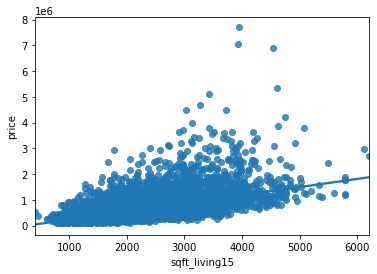

In [939]:
clean_column('sqft_living15')

regplot('sqft_living15')

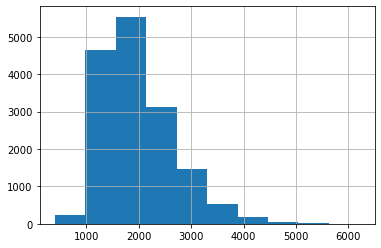

In [940]:
hist('sqft_living15')

### 'sqft_lot15'

The square footage of the land lots of the nearest 15 neighbors

Datatype: int64
Total unique itms: 7126
Displaying first 10:
[  7639   5000   7503 101930   6819   8113   7570   6000  10208   4850]
Minimum value: 659.  Maximum value: 871200
count    15762.00
mean     12900.42
std      27977.23
min        659.00
25%       5100.00
50%       7620.00
75%      10107.50
max     871200.00
Name: sqft_lot15, dtype: float64


<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

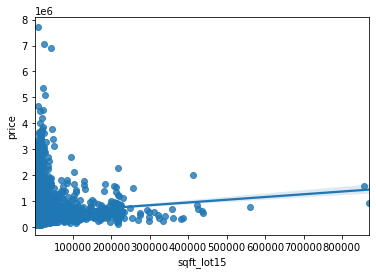

In [941]:
clean_column('sqft_lot15')

regplot('sqft_lot15')

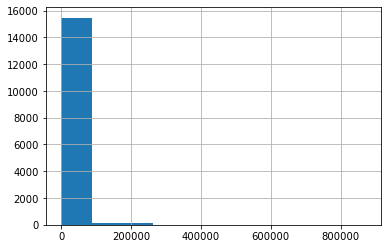

In [942]:
hist('sqft_lot15')

## Remove Outliers

C:\Users\Johnny\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


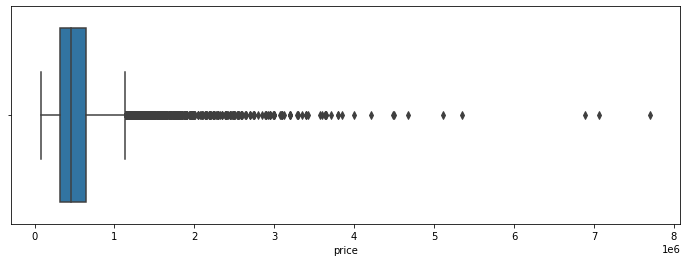

In [943]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(df['price'])

### Target Variable (price)

In [944]:
column = 'price'

describe = df.describe()[column]

q1 = describe['25%']
q3 = describe['75%']

iqr = q3 - q1

outlier_index = (df[column] > (q3 + 1.5 * iqr)) | (df[column] < (q1 - 1.5 * iqr))

df[outlier_index].shape


(831, 21)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

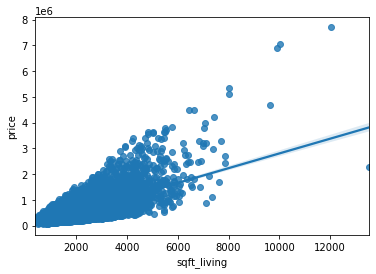

In [945]:
regplot('sqft_living', df=df)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

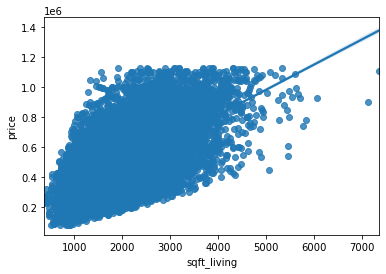

In [946]:
regplot('sqft_living', df=df[~outlier_index])

In [947]:
df = df[~outlier_index]

### Squarefoot Living

In [948]:
column = 'sqft_living'

describe = df.describe()[column]

q1 = describe['25%']
q3 = describe['75%']

iqr = q3 - q1

outlier_index = (df[column] > (q3 + 1.5 * iqr)) | (df[column] < (q1 - 1.5 * iqr))

df[outlier_index].shape


(216, 21)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

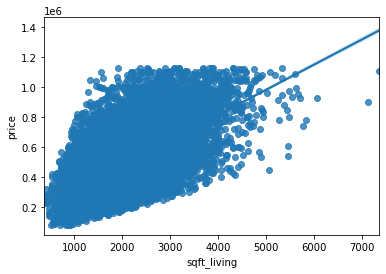

In [949]:
regplot('sqft_living', df=df)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

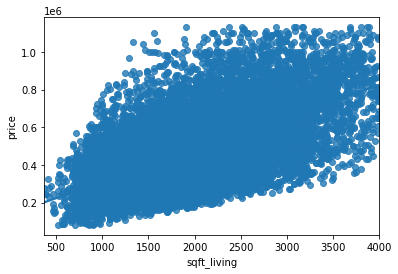

In [950]:
regplot('sqft_living', df=df[~outlier_index])

In [951]:
df = df[~outlier_index]

### Squarefoot Lot

In [952]:
column = 'sqft_lot'

describe = df.describe()[column]

q1 = describe['25%']
q3 = describe['75%']

iqr = q3 - q1

outlier_index = (df[column] > (q3 + 1.5 * iqr)) | (df[column] < (q1 - 1.5 * iqr))

df[outlier_index].shape


(1587, 21)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

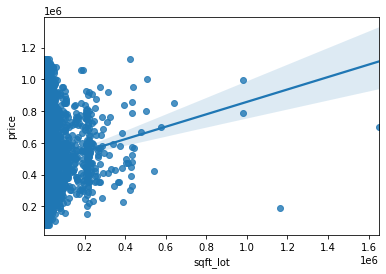

In [953]:
regplot('sqft_lot', df=df)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

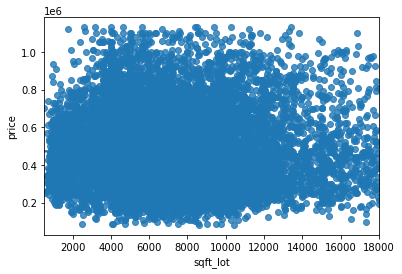

In [954]:
regplot('sqft_lot', df=df[~outlier_index])

In [955]:
df = df[~outlier_index]

# EXPLORE

Now that we're comfortable that we have quality data, it's time to determine which columns we'll want to analyze for our primary analysis.

First we'll review which columns we have to work with:

### Feature Selection

Based on prior anaysis and scrubbing, we'll categorize our columns into three sections:

Continuous variables:
- price
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- yr_built
- sqft_living15
- sqft_lot15
 
Categorical variables - while some of these may appear continuous, their values represent integers and fractions that are more categorical even if they are for a specific count.
- bedrooms
- bathrooms
- floors
- condition
- grade
- waterfront
- renovated
- zipcode
- has_basement
 
Remove from model:
- date - date of sale could be interesting to analyze if we had a longer time horizon.  Home prices could sell for more less based on season, and this could be interesting for further analysis
- lat - will not have a linear relationship
- long - will not have a linear relationship
- view - while we have a range of values, the column description reads "Has been viewed" which should be binary.  Seems like there could be an error, further review could make this column eligible for future analysis

In [956]:
df.drop(['date', 'lat', 'long', 'view'],axis=1,inplace=True)

In [957]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,has_basement,sqft_basement,zipcode,sqft_living15,sqft_lot15,age,renovated
id,,,,,,,,,,,,,,,,,
6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,2170,1,400.00,98125,1690,7639,64,1
2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1050,1,910.00,98136,1360,5000,50,0
1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1680,0,0.00,98074,1800,7503,28,0
1321400060,257500.00,3,2.25,1715,6819,2.00,0.00,3,7,1715,0,0.00,98003,2238,6819,20,0
2414600126,229500.00,3,1.00,1780,7470,1.00,0.00,3,7,1050,1,730.00,98146,1780,8113,55,0


## Multicollinearity

We will create a heat map to identify multicollinearity.

(<Figure size 1080x720 with 2 Axes>, <AxesSubplot:>)

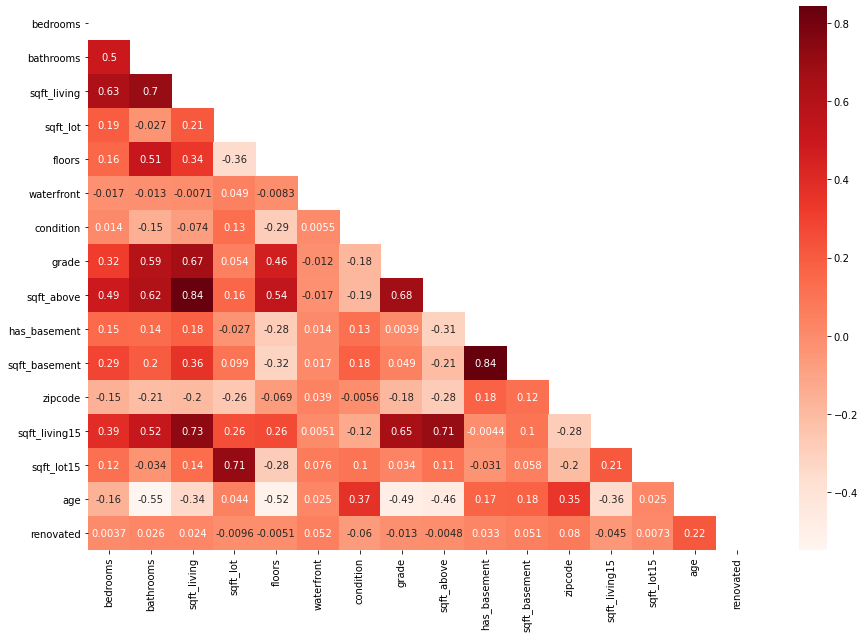

In [958]:
def heatmap(df_name, figsize=(15,10), cmap='Reds'):
    corr = df_name.drop('price',axis=1).corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr, annot=True, cmap=cmap, mask=mask)
    return fig, ax

heatmap(df)

We will drop the following:

sqft_above + sqft_basement - these are duplicative of sqft_living.

sqft_lot15 and sqft_living15 - these could be more interesting for broader analysis of areas.  Since there is high multicolinearity, we can save these for when we look at zip, lat, and long.

In [959]:
del df['sqft_above']
del df['sqft_basement']
del df['sqft_lot15']
del df['sqft_living15']

(<Figure size 1080x720 with 2 Axes>, <AxesSubplot:>)

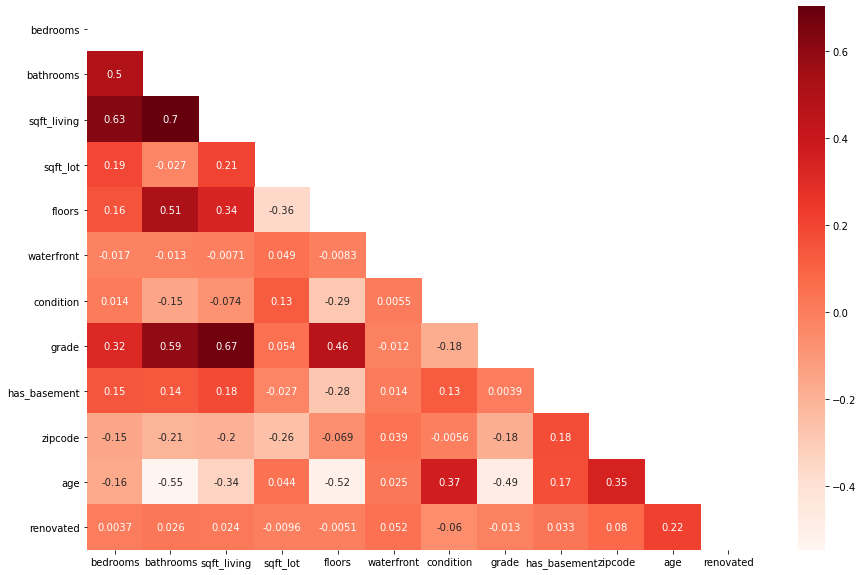

In [960]:
heatmap(df)

Sqft_living, bathrooms, and grade appear to have potential for multicollinearity.  This issue should be remedied by encoding grade and bathrooms as categorical variables, which we will do next in the modeling stage.

# MODEL

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [961]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,has_basement,zipcode,age,renovated
id,,,,,,,,,,,,,
6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,1,98125,64,1
2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1,98136,50,0
1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,0,98074,28,0
1321400060,257500.00,3,2.25,1715,6819,2.00,0.00,3,7,0,98003,20,0
2414600126,229500.00,3,1.00,1780,7470,1.00,0.00,3,7,1,98146,55,0


Installing stats and modeling packages:

In [962]:
!pip install -U fsds
from scipy import stats
from fsds.imports import *

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

import scipy.stats as stats
import statsmodels.api as sms

Requirement already up-to-date: fsds in c:\users\johnny\anaconda3\envs\learn-env\lib\site-packages (0.3.2)


## Initial Model

We'll go ahead and define our categorical variables so that we can implement the code into our model function:

In [963]:
categoricals = ['bedrooms', 
                'bathrooms', 
                'floors', 
                'waterfront', 
                'condition', 
                'grade', 
                'has_basement',
                'zipcode',
                'renovated']


Function to draw a QQ plot and a homoscedasticity check.

In [964]:
def check_model(model):

    resids = model.resid

    fig,ax = plt.subplots(ncols=2,figsize=(12,5))
    sms.qqplot(resids, stats.distributions.norm, fit=True, line='45',ax=ax[0])
    xs = np.linspace(0,1,len(resids))

    y_hat = model.predict(df)
    y = df['price']
    resid = y - y_hat
    plot = plt.scatter(x=y_hat, y=resid)
    plt.axhline(0)

    ax[1].scatter(x=y_hat,y=resid)
    
    return fig,ax

# check_model(model1)

Function to run the model and output summary statistics and graphs.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     528.1
Date:                Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:41:39   Log-Likelihood:            -1.6728e+05
No. Observations:               13128   AIC:                         3.348e+05
Df Residuals:                   13006   BIC:                         3.357e+05
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -9.876e+04   1.01e+05     -0.982      0.326   -2.96e+05    9.83e+04
C(bedrooms)[T.2]      2.301e+04   8216.216      2.801      0.005    6909.675    3.91e+04
C(bedrooms)[T.3]        2.7e+04   8254.582      3.271      0.001    1.08e+04    4.32e+04
C(bedrooms)[T.4]      2.241e+04   8461.542      2.648      0.008    5820.465     3.9e+04
C(bedrooms)[T.5]      3583.0277   8999.648      0.398      0.691   -1.41e+04    2.12e+04
C(bedrooms)[T.6]     -1.056e+04   1.14e+04     -0.930      0.352   -3.28e+04    1.17e+04
C(bedrooms)[T.7]     -7.404e+04   2.71e+04     -2.736      0.006   -1.27e+05    -2.1e+04
C(bedrooms)[T.8]     -6.436e+04   4.47e+04     -1.438      0.150   -1.52e+05    2.33e+04
C(bedrooms)[T.9]     -3.607e+04   4.97e+04     -0.725      0.468   -1.34e+05    6.14e+04
C(bedrooms)[T.10]    -8.564e+04   5.98e+04     -1.433      0.152   -2.03e+05    3.15e+04
C(bathrooms)[T.0.75]  7.438e+04   5.02e+04      1.481      0.139   -2.41e+04    1.73e+05
C(bathrooms)[T.1.0]   5.476e+04   4.82e+04      1.135      0.256   -3.98e+04    1.49e+05
C(bathrooms)[T.1.25] -7768.4739    6.1e+04     -0.127      0.899   -1.27e+05    1.12e+05
C(bathrooms)[T.1.5]   5.413e+04   4.83e+04      1.120      0.263   -4.06e+04    1.49e+05
C(bathrooms)[T.1.75]  6.184e+04   4.83e+04      1.280      0.201   -3.28e+04    1.57e+05
C(bathrooms)[T.2.0]   5.548e+04   4.83e+04      1.148      0.251   -3.92e+04     1.5e+05
C(bathrooms)[T.2.25]  7.001e+04   4.84e+04      1.448      0.148   -2.48e+04    1.65e+05
C(bathrooms)[T.2.5]   7.532e+04   4.84e+04      1.558      0.119   -1.95e+04     1.7e+05
C(bathrooms)[T.2.75]  8.495e+04   4.84e+04      1.754      0.079   -9989.586     1.8e+05
C(bathrooms)[T.3.0]   7.791e+04   4.85e+04      1.606      0.108   -1.72e+04    1.73e+05
C(bathrooms)[T.3.25]  9.081e+04   4.87e+04      1.866      0.062   -4601.525    1.86e+05
C(bathrooms)[T.3.5]   9.761e+04   4.86e+04      2.007      0.045    2293.217    1.93e+05
C(bathrooms)[T.3.75]  1.282e+05   5.02e+04      2.554      0.011    2.98e+04    2.27e+05
C(bathrooms)[T.4.0]   1.155e+05    5.1e+04      2.266      0.023    1.56e+04    2.15e+05
C(bathrooms)[T.4.25]  1.094e+05   5.34e+04      2.050      0.040    4791.896    2.14e+05
C(bathrooms)[T.4.5]   4.581e+04   5.23e+04      0.876      0.381   -5.67e+04    1.48e+05
C(bathrooms)[T.4.75]  4.697e+04   9.64e+04      0.487      0.626   -1.42e+05    2.36e+05
C(bathrooms)[T.5.0]   5.973e+04   7.01e+04      0.852      0.394   -7.76e+04    1.97e+05
C(bathrooms)[T.5.25]  7.382e+04   7.66e+04      0.964      0.335   -7.63e+04    2.24e+05
C(bathrooms)[T.5.75]  7571.4517   9.97e+04      0.076      0.939   -1.88e+05    2.03e+05
C(floors)[T.1.5]      6442.3648   3045.998      2.115      0.034     471.763    1.24e+04
C(floors)[T.2.0]     -4812.8409   2673.418     -1.800    

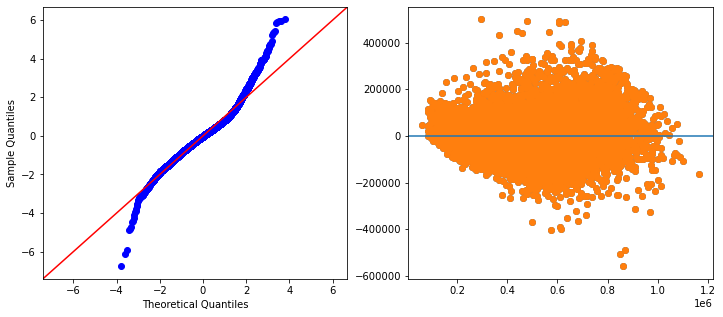

In [965]:
def make_model(df_name, categoricals=categoricals):

    features = ' + '.join(df.drop('price',axis=1).columns)
    for variable in categoricals:
        features = features.replace(variable, ("C(" + variable + ")"))

    f  = "price~"+features

    model = smf.ols(f, df_name).fit()
    display(model.summary())

    fig,ax = check_model(model)
    plt.show()
    
    return model

model1 = make_model(df)

Our first model has a fairly strong R-squared at 0.831.  The QQ plot indicates that there might be some outliers that we could remove to further refine our model.  The homoscedasticity graph also shows some outliers, but the graph has a noticeable cone shape indicating we are mostly on track with our current refinement of the overall dataset.

## Refining based on P-values

Next, we'll want to look at the features that have a P-value greater than 0.05.  Removing these features will help us isolate the most statistically significant variables of our model.

In [966]:
model1.pvalues

pvals = model1.pvalues

pvals[pvals > 0.05]
# pvals[pvals > 0.05].index

Intercept              0.33
C(bedrooms)[T.5]       0.69
C(bedrooms)[T.6]       0.35
C(bedrooms)[T.8]       0.15
C(bedrooms)[T.9]       0.47
C(bedrooms)[T.10]      0.15
C(bathrooms)[T.0.75]   0.14
C(bathrooms)[T.1.0]    0.26
C(bathrooms)[T.1.25]   0.90
C(bathrooms)[T.1.5]    0.26
C(bathrooms)[T.1.75]   0.20
C(bathrooms)[T.2.0]    0.25
C(bathrooms)[T.2.25]   0.15
C(bathrooms)[T.2.5]    0.12
C(bathrooms)[T.2.75]   0.08
C(bathrooms)[T.3.0]    0.11
C(bathrooms)[T.3.25]   0.06
C(bathrooms)[T.4.5]    0.38
C(bathrooms)[T.4.75]   0.63
C(bathrooms)[T.5.0]    0.39
C(bathrooms)[T.5.25]   0.34
C(bathrooms)[T.5.75]   0.94
C(floors)[T.2.0]       0.07
C(floors)[T.3.5]       0.10
C(grade)[T.4]          0.22
C(grade)[T.5]          0.11
C(grade)[T.6]          0.13
C(grade)[T.7]          0.24
C(grade)[T.8]          0.55
C(grade)[T.9]          0.70
C(grade)[T.10]         0.40
C(zipcode)[T.98002]    0.25
C(zipcode)[T.98003]    0.39
C(zipcode)[T.98022]    0.61
C(zipcode)[T.98030]    0.55
C(zipcode)[T.98031] 

It seems that certain bedroom numbers don't have a significant effect.  Bathrooms have very little effect.  1.5 and 3.5 floors might not have an effect, likely due to low representaion in dataset.  Some conditions seems important, grade seems negligible, and a 12 of the 69 zip codes are not significant.

We will remove the following features since more than half of their representative categoricals are not significant:

- bedrooms
- bathrooms
- grade

In [967]:
df = df.drop(['bedrooms', 'bathrooms', 'grade'], axis=1)

In [968]:
df.head()

,price,sqft_living,sqft_lot,floors,waterfront,condition,has_basement,zipcode,age,renovated
id,,,,,,,,,,
6414100192,538000.00,2570,7242,2.00,0.00,3,1,98125,64,1
2487200875,604000.00,1960,5000,1.00,0.00,5,1,98136,50,0
1954400510,510000.00,1680,8080,1.00,0.00,3,0,98074,28,0
1321400060,257500.00,1715,6819,2.00,0.00,3,0,98003,20,0
2414600126,229500.00,1780,7470,1.00,0.00,3,1,98146,55,0


In [969]:
categoricals = [
#                 'bedrooms', 
#                 'bathrooms', 
                'floors', 
                'waterfront', 
                'condition', 
#                 'grade', 
                'has_basement',
                'zipcode',
                'renovated'
                ]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     617.7
Date:                Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:41:40   Log-Likelihood:            -1.6841e+05
No. Observations:               13128   AIC:                         3.370e+05
Df Residuals:                   13043   BIC:                         3.376e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.882e+05   2.64e+04     -7.127      0.000    -2.4e+05   -1.36e+05
C(floors)[T.1.5]      9218.9133   3242.995      2.843      0.004    2862.170    1.56e+04
C(floors)[T.2.0]      1.145e+04   2699.623      4.241      0.000    6157.285    1.67e+04
C(floors)[T.2.5]      1225.8619   1.15e+04      0.107      0.915   -2.13e+04    2.38e+04
C(floors)[T.3.0]     -2.247e+04   5929.341     -3.790      0.000   -3.41e+04   -1.08e+04
C(floors)[T.3.5]     -4.043e+04   4.07e+04     -0.992      0.321    -1.2e+05    3.94e+04
C(waterfront)[T.1.0]  3.378e+05   2.02e+04     16.763      0.000    2.98e+05    3.77e+05
C(condition)[T.2]     8.736e+04   2.69e+04      3.250      0.001    3.47e+04     1.4e+05
C(condition)[T.3]     1.288e+05   2.53e+04      5.089      0.000    7.92e+04    1.78e+05
C(condition)[T.4]     1.458e+05   2.53e+04      5.762      0.000    9.62e+04    1.95e+05
C(condition)[T.5]     1.741e+05   2.54e+04      6.854      0.000    1.24e+05    2.24e+05
C(has_basement)[T.1] -2.363e+04   2044.381    -11.561      0.000   -2.76e+04   -1.96e+04
C(zipcode)[T.98002]   3273.3380   9714.062      0.337      0.736   -1.58e+04    2.23e+04
C(zipcode)[T.98003]   1.968e+04   8861.380      2.221      0.026    2315.287    3.71e+04
C(zipcode)[T.98004]   5.533e+05   1.11e+04     49.936      0.000    5.32e+05    5.75e+05
C(zipcode)[T.98005]   3.733e+05   1.16e+04     32.140      0.000     3.5e+05    3.96e+05
C(zipcode)[T.98006]   3.195e+05   8420.462     37.937      0.000    3.03e+05    3.36e+05
C(zipcode)[T.98007]   2.767e+05   1.12e+04     24.653      0.000    2.55e+05    2.99e+05
C(zipcode)[T.98008]   2.677e+05   9070.409     29.519      0.000     2.5e+05    2.86e+05
C(zipcode)[T.98010]   8.794e+04   1.79e+04      4.901      0.000    5.28e+04    1.23e+05
C(zipcode)[T.98011]   1.592e+05   1.02e+04     15.578      0.000    1.39e+05    1.79e+05
C(zipcode)[T.98014]   8.193e+04   1.72e+04      4.766      0.000    4.82e+04    1.16e+05
C(zipcode)[T.98019]   8.668e+04   1.14e+04      7.579      0.000    6.43e+04    1.09e+05
C(zipcode)[T.98022]   1.061e+04   1.07e+04      0.988      0.323   -1.04e+04    3.17e+04
C(zipcode)[T.98023]     25.9815   7897.722      0.003      0.997   -1.55e+04    1.55e+04
C(zipcode)[T.98024]   1.245e+05   2.12e+04      5.876      0.000     8.3e+04    1.66e+05
C(zipcode)[T.98027]   2.665e+05   9265.219     28.765      0.000    2.48e+05    2.85e+05
C(zipcode)[T.98028]   1.475e+05   9073.443     16.253      0.000     1.3e+05    1.65e+05
C(zipcode)[T.98029]   2.666e+05   8694.197     30.664      0.000     2.5e+05    2.84e+05
C(zipcode)[T.98030]   1.129e+04   9218.780      1.225      0.221   -6775.191    2.94e+04
C(zipcode)[T.98031]   2.115e+04   9073.600      2.331      0.020    3361.926    3.89e+04
C(zipcode)[T.98032]    1.05e+04   1.13e+04      0.929    

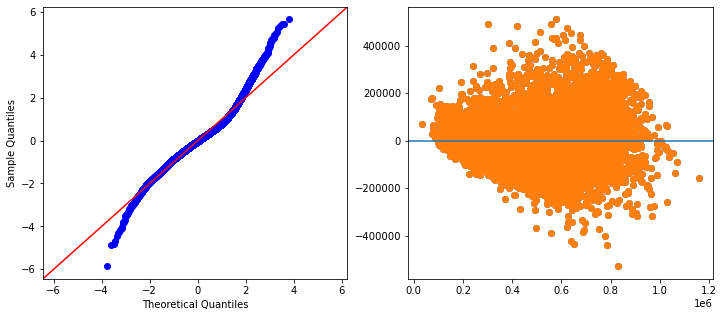

In [970]:
model1 = make_model(df, categoricals)

In [971]:
model1.pvalues

pvals = model1.pvalues

pvals[pvals > 0.05]
# pvals[pvals > 0.05].index

C(floors)[T.2.5]      0.92
C(floors)[T.3.5]      0.32
C(zipcode)[T.98002]   0.74
C(zipcode)[T.98022]   0.32
C(zipcode)[T.98023]   1.00
C(zipcode)[T.98030]   0.22
C(zipcode)[T.98032]   0.35
C(zipcode)[T.98042]   0.14
C(zipcode)[T.98092]   0.54
dtype: float64

After running our p-value check again, some zip codes are still insignificant, but not enough to remove zip codes from the model.  The 2.5 and 3.5 floors are insignificant, but that is likely due to half-floors having little representation in our dataset.  

In [972]:
# df = df.drop(['floors'], axis=1)

In [973]:
# categoricals = [
# #                 'bedrooms', 
# #                 'bathrooms', 
# #                 'floors', 
#                 'waterfront', 
#                 'condition', 
# #                 'grade', 
#                 'has_basement',
#                 'zipcode',
#                 'renovated'
#                 ]

In [974]:
# model1 = make_model(df, categoricals)
# model1.summary()

In [982]:
coeffs = model1.params
coeffs_list = coeffs.sort_values(ascending=False).round(2)

coeff_df = coeffs_list.to_frame()

# type(model1.params)
pd.options.display.max_rows = 999
coeff_df = coeff_df.reset_index()
coeff_df = coeff_df.rename(columns={'index': 'Variable', 0: 'Dollar Impact'})

# coeff_df['Dollar Impact'] = coeff_df['Dollar Impact'].apply(lambda x: "${:.2f}".format((x)))
coeff_df['Dollar Impact'] = coeff_df['Dollar Impact'].apply(lambda x: "{:,}".format(x))

coeff_df[~coeff_df['Variable'].str.contains("zipcode")]

# coeff_df[~coeff_df['Variable'].str.contains("zipcode")].to_csv('data/coeffs.csv')

,Variable,Dollar Impact
17,C(waterfront)[T.1.0],"337,780.33"
35,C(condition)[T.5],"174,135.47"
41,C(condition)[T.4],"145,846.97"
45,C(condition)[T.3],"128,815.16"
53,C(condition)[T.2],"87,360.03"
63,C(renovated)[T.1],"42,260.43"
69,C(floors)[T.2.0],"11,448.94"
73,C(floors)[T.1.5],"9,218.91"
75,C(floors)[T.2.5],"1,225.86"
76,sqft_living,159.48


## Observations

Before looking at zipcode, let's take a look at our feature coefficients, which represent price impact.

Waterfront is the most impactful, adding \\$338k to price.

Condition lines up with our expectations.  The greater the condition, the more valuable the home.  Improving the condition from 1 to 5 would add an estimated \\$174,135
 minus \\$87,360 = \\$86,775 to a home owner's value.

Renovated homes seem to fetch a larger price of approximately \\$42,260, which aligns with expectations.

Floors is a bit counterintuitive.  While 2 floors seems to increase the value by \\$11.5k, a third floor decreases value by \\$22.5k, 3.5 floors decreases by \\$40.5k.  Considering the cost of adding an additional floor would likely be much more expensive than these coefficients, this might indicate that expanding the square footage of a home within floors that already exist might be a more sensible investment.

Sqft_living gives us an estimated value of \\$159 for every additional square foot of space.

On the surface, sqft_lot looks like it has a relatively lower impact on price.  However, it is still relevant when comparing properties with significant differences in size.  One acre is 43,560 square feet.  Our model predicts that with a \\$3.45 impact to price for every square foot, an additional acre would add \\$150,282 to the value of two otherwise identical properties.

Age doesn't seem to have a tangible impact.  Despite having a P-value greater than 0.05, a house will lose \\$168 in value.  Even in the case of our oldest houses, age can only have a maximum price impact of \\$19,425.

Perhaps counterintuitively, the presence of a basement decreases the value of a home by \\$23,634.  This might require further examination.

In [976]:
print('Most valuable zip codes:')
print(coeff_df[coeff_df['Variable'].str.contains("zipcode")].head(5))
print('Least valuable zip codes:')
print(coeff_df[coeff_df['Variable'].str.contains("zipcode")].tail(5))

Most valuable zip codes:
              Variable Dollar Impact
0  C(zipcode)[T.98039]    628,000.93
1  C(zipcode)[T.98004]    553,256.56
2  C(zipcode)[T.98112]     494,473.0
3  C(zipcode)[T.98119]    481,396.09
4  C(zipcode)[T.98109]    473,148.05
Least valuable zip codes:
               Variable Dollar Impact
71  C(zipcode)[T.98022]     10,614.08
72  C(zipcode)[T.98032]      10,500.9
74  C(zipcode)[T.98002]      3,273.34
77  C(zipcode)[T.98023]         25.98
80  C(zipcode)[T.98092]     -5,509.67


Depending on the location, zip codes can have the most dramatic impact on price.  The most valuable zip codes are those closest to the metropolitan city center (Seattle, Bellevue, and Mercer Island).  The impact on price in the top 5 zip codes is an estimated \\$473-628k.

Other than the least valuable zip code, our model functions in a way that doesn't subtract estimated value from homes.  The bottom 5 zip codes are located in Kent, near the southern end of King County.  While not the furthest from the city center, they are significantly further than our more valuable zip codes.

# INTERPRET

Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

Our model has a semi-strong fit with an adjusted R-squared of 0.798.  This means it has a predictive power of roughly 79.8%.  

Additional steps could be taken to improve predictive power.  Standardization and logistic normalization would theoretically improve R-squared and allow us to make more accurate predictions.  We did not incorporate these processes into our model because we were more interested in the practical recommendations it could provide, and inferences are difficult to interpret after normalization.

There are likely improvements that we could make to hone in on accuracy.  For our residential clients interest in improving the value of their homes, a 79.8% confidence level seems strong enough to make at least some base line recommendations.

# CONCLUSIONS & RECOMMENDATIONS

Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

## Visuals

Visuals

Zip code horizontal bar graph – can I show the little lines on the bar for variance?

Renovation and basement and third floor

Renovate for condition

Renovation bonus + 1-2, 2-3, 3-4, 4-5, 

1 story house recommendations:
Add ons 500 sqft, 100 sqft, 2nd floor (adds 1,240 sqft), basement (adds 1,240 sqft)

Ren


In [995]:
f1_df = df[(df['floors'] == 1.00) & (df['has_basement'] == 0)]

f1_df['sqft_living'].describe()

count   3315.00
mean    1284.17
std      402.62
min      370.00
25%      990.00
50%     1240.00
75%     1510.00
max     3430.00
Name: sqft_living, dtype: float64

In [996]:
f1_df = df[(df['floors'] == 2.00) & (df['has_basement'] == 0)]

f1_df['sqft_living'].describe()

count   3701.00
mean    2308.19
std      631.00
min      680.00
25%     1850.00
50%     2260.00
75%     2730.00
max     4000.00
Name: sqft_living, dtype: float64

## Zipcode Graph

In [1035]:
coeffs = model1.params
coeffs_list = coeffs.sort_values(ascending=False).round(2)

coeff_df = coeffs_list.to_frame()

# type(model1.params)
pd.options.display.max_rows = 999
coeff_df = coeff_df.reset_index()
coeff_df = coeff_df.rename(columns={'index': 'Variable', 0: 'Dollar Impact'})

# coeff_df['Dollar Impact'] = coeff_df['Dollar Impact'].apply(lambda x: "${:.2f}".format((x)))
# coeff_df['Dollar Impact'] = coeff_df['Dollar Impact'].apply(lambda x: "{:,}".format(x))

coeff_df[coeff_df['Variable'].str.contains("zipcode")]

# coeff_df[~coeff_df['Variable'].str.contains("zipcode")].to_csv('data/coeffs.csv')

,Variable,Dollar Impact
0,C(zipcode)[T.98039],628000.93
1,C(zipcode)[T.98004],553256.56
2,C(zipcode)[T.98112],494473.00
3,C(zipcode)[T.98119],481396.09
4,C(zipcode)[T.98109],473148.05
5,C(zipcode)[T.98040],470610.15
6,C(zipcode)[T.98102],464316.96
7,C(zipcode)[T.98105],427272.22
8,C(zipcode)[T.98199],405298.42
9,C(zipcode)[T.98107],373387.95


In [1036]:
zip_df = coeff_df[coeff_df['Variable'].str.contains("zipcode")]
zip_df.head()

,Variable,Dollar Impact
0,C(zipcode)[T.98039],628000.93
1,C(zipcode)[T.98004],553256.56
2,C(zipcode)[T.98112],494473.00
3,C(zipcode)[T.98119],481396.09
4,C(zipcode)[T.98109],473148.05


In [1037]:
zipcodes = []

for row in zip_df['Variable']:
    old = row
    old = old.replace("C(zipcode)[T.", "")
    old = old.replace("]", "")
    zipcodes.append(old)
    
zip_df['Zip Code'] = zipcodes

zip_df.head()

<ipython-input-1037-1481b7f7e852>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['Zip Code'] = zipcodes


,Variable,Dollar Impact,Zip Code
0,C(zipcode)[T.98039],628000.93,98039
1,C(zipcode)[T.98004],553256.56,98004
2,C(zipcode)[T.98112],494473.00,98112
3,C(zipcode)[T.98119],481396.09,98119
4,C(zipcode)[T.98109],473148.05,98109


In [1042]:
# zip_df = zip_df.drop(['Variable'], axis=1)

#bar graph top 5 and separate for bottom 5

zip_df

,Dollar Impact,Zip Code
0,628000.93,98039
1,553256.56,98004
2,494473.00,98112
3,481396.09,98119
4,473148.05,98109
5,470610.15,98040
6,464316.96,98102
7,427272.22,98105
8,405298.42,98199
9,373387.95,98107


In [1044]:
zip_df_top5 = zip_df.head()

zip_df_bottom5 = zip_df.tail()

type(zip_df['Dollar Impact'])

zip_df['Dollar Impact'].describe()

# ax = sns.barplot(x="Dollar Impact", y="zipcode", data=zip_df)


zip_df['Zip Code'] = zip_df['Zip Code'].astype(int)
zip_df['Dollar Impact'] = zip_df['Dollar Impact'].astype(float)

print(zip_df['Zip Code'].describe())

count      69.00
mean    98078.41
std        56.27
min     98002.00
25%     98030.00
50%     98070.00
75%     98118.00
max     98199.00
Name: Zip Code, dtype: float64


In [1047]:
zip_df_top5

,Dollar Impact,Zip Code
0,628000.93,98039
1,553256.56,98004
2,494473.00,98112
3,481396.09,98119
4,473148.05,98109


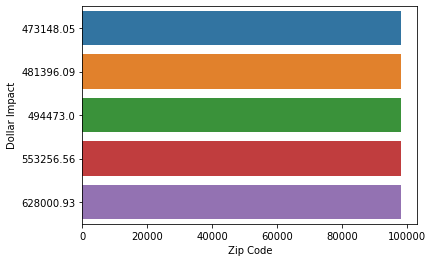

In [1050]:
ax = sns.barplot(x="Zip Code", y="Dollar Impact", data=zip_df_top5, orient='h')

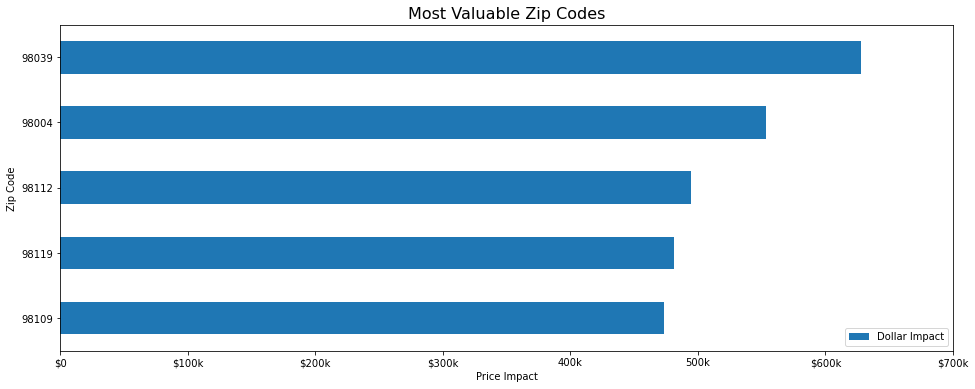

In [1057]:
import pandas as pd 
import matplotlib.pyplot as plt

data = zip_df_top5
data.plot(x="Zip Code", y="Dollar Impact", kind="barh",figsize=(16, 6))

# plt.legend((["Film Budget ($)", "Box Office Revenue ($)"]))
ax = plt.gca()
ax.set_xticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000])
ax.set_xticklabels(['$0', '$100k', '$200k', '$300k', '400k', '500k', '$600k', '$700k'])
ax.set_title('Most Valuable Zip Codes', fontsize=16)
plt.ylabel('Zip Code')
plt.xlabel('Price Impact')

ax.invert_yaxis()

# plt.savefig('images/genre_comparison_median.png')

plt.show()

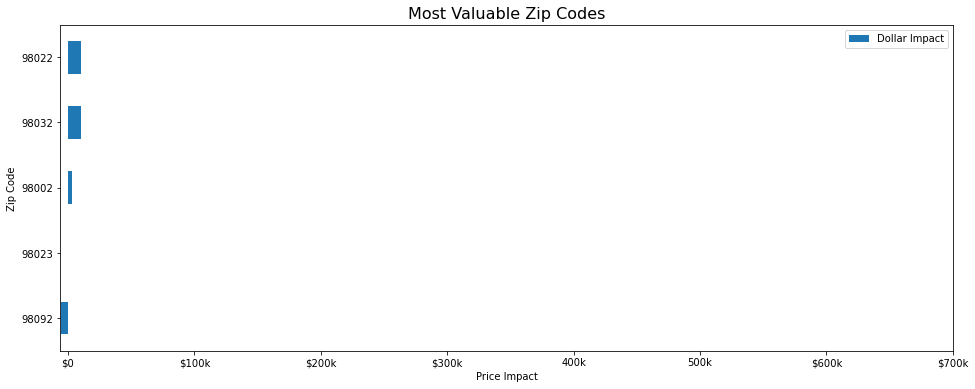

In [1058]:
import pandas as pd 
import matplotlib.pyplot as plt

data = zip_df_bottom5
data.plot(x="Zip Code", y="Dollar Impact", kind="barh",figsize=(16, 6))

# plt.legend((["Film Budget ($)", "Box Office Revenue ($)"]))
ax = plt.gca()
ax.set_xticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000])
ax.set_xticklabels(['$0', '$100k', '$200k', '$300k', '400k', '500k', '$600k', '$700k'])
ax.set_title('Most Valuable Zip Codes', fontsize=16)
plt.ylabel('Zip Code')
plt.xlabel('Price Impact')

ax.invert_yaxis()

# plt.savefig('images/genre_comparison_median.png')

plt.show()

## Renovation Suggestions

1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>


2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
       
6. **Interpret final model and draw >=3 conclusions and recommendations from dataset**

## Standardizing for coefficient strength

In [985]:
standardized_df = df.apply(stats.zscore)

In [ ]:
# standardize = ['price', sqft_living, sqft_lot, age]

In [987]:
standardized_df.head()

,price,sqft_living,sqft_lot,floors,waterfront,condition,has_basement,zipcode,age,renovated
id,,,,,,,,,,
6414100192,0.37,0.98,0.02,0.97,-0.04,-0.63,1.27,0.81,0.64,5.18
2487200875,0.70,0.10,-0.63,-0.87,-0.04,2.44,1.27,1.02,0.17,-0.19
1954400510,0.23,-0.31,0.27,-0.87,-0.04,-0.63,-0.79,-0.13,-0.56,-0.19
1321400060,-1.03,-0.26,-0.10,0.97,-0.04,-0.63,-0.79,-1.45,-0.83,-0.19
2414600126,-1.17,-0.16,0.09,-0.87,-0.04,-0.63,1.27,1.20,0.34,-0.19


In [999]:
# make_model(standardized_df, categoricals)